<img src="http://iran-datascience.ir/SoheilTP/logo.jpg" />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Day 007: Logistic Regression (Iris Dataset)</h3>
    <h4 align="center"><a href="http://www.iran-machinelearning.ir">Soheil Tehranipour</a></h5>
</div>

> You can follow me in :
* [Linkedin](https://www.linkedin.com/in/soheiltehrani/). 
* [Instagram](https://www.instagram.com/soheiltehranipour/).
* [Github](https://github.com/soheiltehranipour).
* Website : www.iran-machinelearning.ir


## What is Logistic Regression?

It is used to determine the value of a continuous dependent variable. 
Logistic Regression is generally used for classification purposes. Unlike `Linear Regression`, the dependent variable can take a limited number of values only i.e, the dependent variable is categorical. When the number of possible outcomes is only two it is called Binary Logistic Regression.

* In Linear Regression, the output is the weighted sum of inputs. Logistic Regression is a generalized Linear Regression in the sense that we don’t output the weighted sum of inputs directly, but we pass it through a function that can map any real value between 0 and 1.

<img src = "http://iran-datascience.ir/SoheilTP/linear_vs_logistic_regression.png">

> In the Figure below, difference between logistic and linear regression can be found better

<img src = "http://iran-datascience.ir/SoheilTP/linear_vs_logistic_regression2.png">

## About Iris Dataset

We will use the well known Iris data set. It contains 3 classes of 50 instances each, where each class refers to a type of iris plant. To simplify things, we take just the first two feature columns. Also, the two non-linearly separable classes are labeled with the same category, ending up with a binary classification problem.

<img src = "http://iran-datascience.ir/SoheilTP/iris.png">

In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [26]:
iris = datasets.load_iris()

In [27]:
X = iris.data[:, :2]
y = (iris.target != 0) * 1

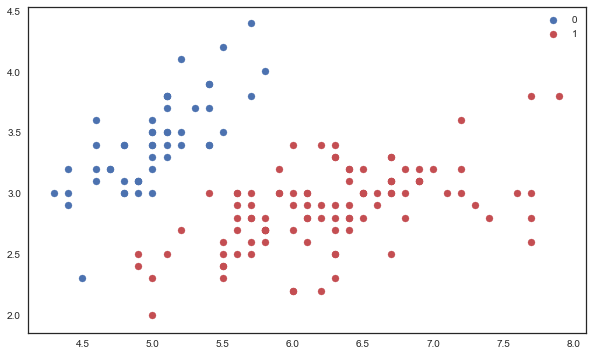

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

## Logistic Regression - Iris Dataset

logistic regression would, in this synthetic dataset, classify values as either 0 or 1, i.e. class one or two, using the logistic curve.

In [57]:
iris = pd.read_csv('Iris.csv')

In [58]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
iris['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [46]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [47]:
iris.drop("Id", axis=1, inplace = True)

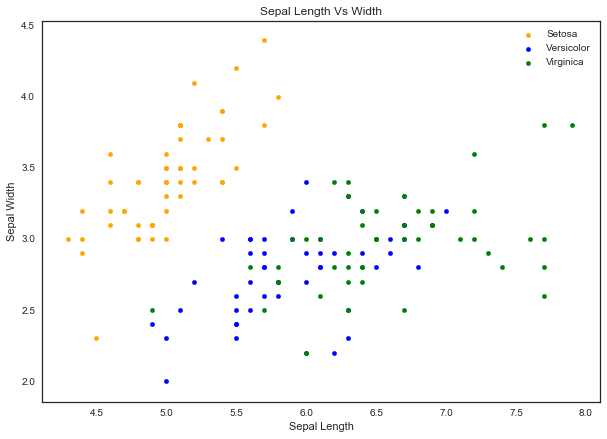

In [48]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

In [54]:
iris.shape

(150, 5)

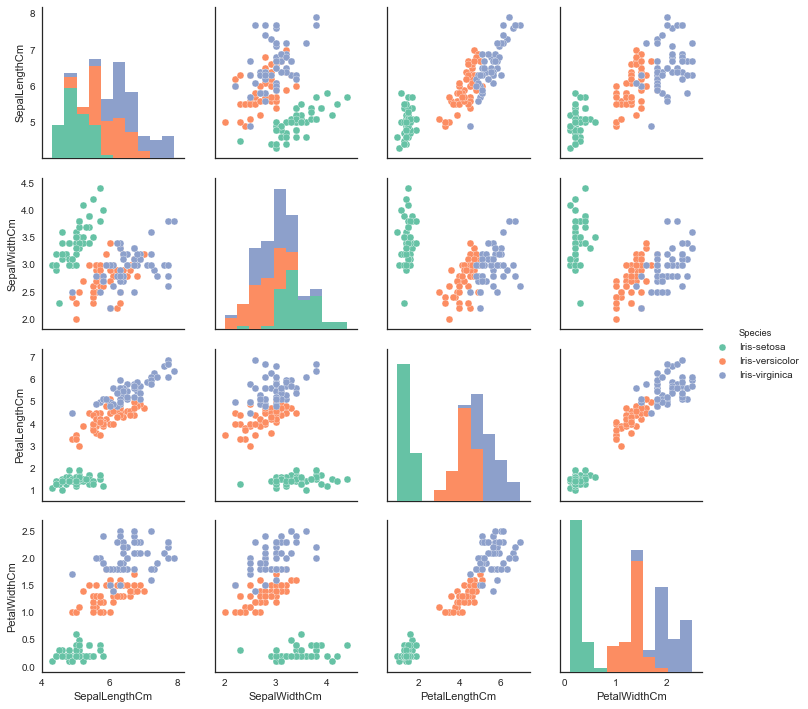

In [53]:
sns.pairplot(data=iris, hue='Species', palette='Set2')

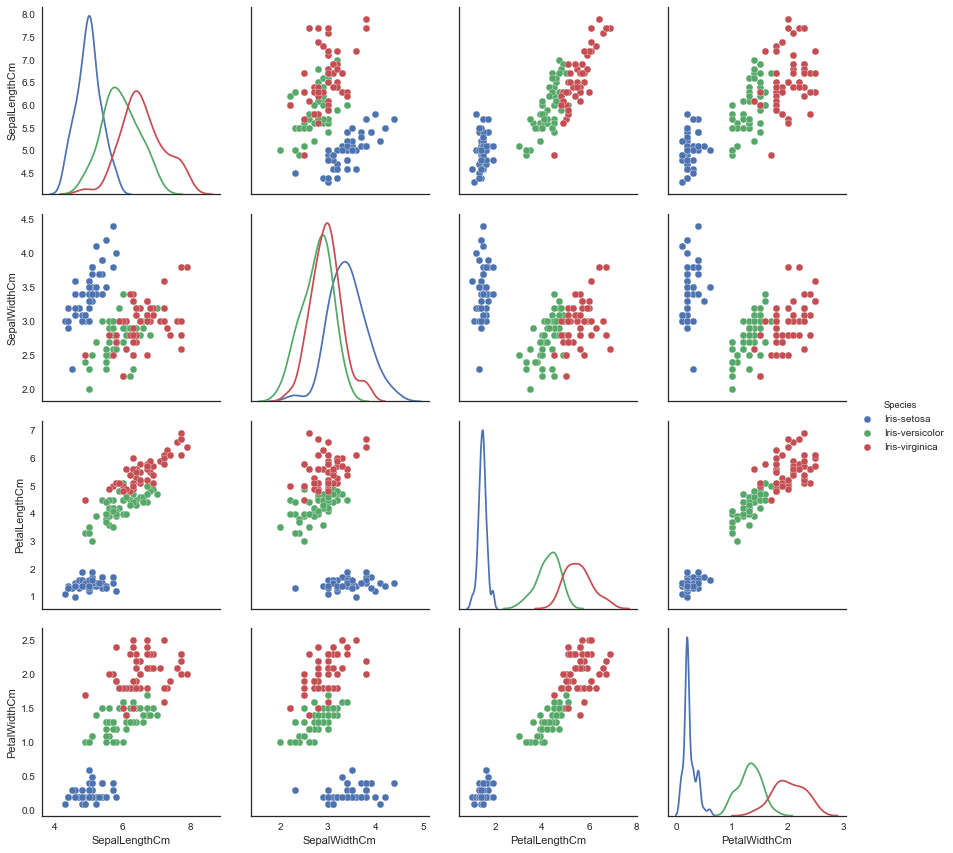

In [75]:
sns.pairplot(iris.drop('Id', axis=1), hue='Species', size=3, diag_kind='kde')

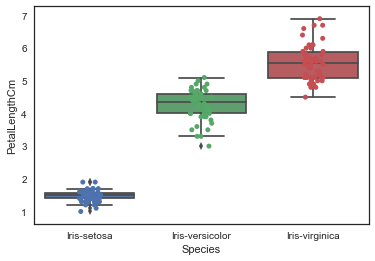

In [74]:
ax = sns.boxplot(data=iris, x = 'Species',y = 'PetalLengthCm')
ax = sns.stripplot(data=iris, x='Species', y='PetalLengthCm', jitter=True, edgecolor='green')

## Training and Test 

Select any algorithm based on the problem (classification or regression) whatever you feel may be good. Then pass the training dataset to the algorithm to train it. We use the .fit() method Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method. We then check the accuracy by passing the predicted outcome and the actual output to the model.

In [72]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.cross_validation import train_test_split # to split the dataset for training and testing 
from sklearn import metrics # for checking the model accuracy

In [63]:
train, test = train_test_split(iris, test_size=0.3) 
# our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 6)
(45, 6)


In [64]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking the training data features
train_y = train.Species # output of the training data

test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data feature
test_y = test.Species # output value of the test data

In [68]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
57,4.9,2.4,3.3,1.0
17,5.1,3.5,1.4,0.3
106,4.9,2.5,4.5,1.7
62,6.0,2.2,4.0,1.0
131,7.9,3.8,6.4,2.0


In [69]:
train_y.head()

57     Iris-versicolor
17         Iris-setosa
106     Iris-virginica
62     Iris-versicolor
131     Iris-virginica
Name: Species, dtype: object

In [70]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
61,5.9,3.0,4.2,1.5
2,4.7,3.2,1.3,0.2
13,4.3,3.0,1.1,0.1
109,7.2,3.6,6.1,2.5
63,6.1,2.9,4.7,1.4


In [73]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Logistic Regression is:  0.9777777777777777


<img src="http://iran-datascience.ir/SoheilTP/end.png">